In [1]:
# Setup imports and short-form names for each of the packages needed for data processing and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn.objects as so
from seaborn import axes_style
%matplotlib inline

In [29]:
data = pd.read_csv('routes.csv', dtype={'id': str, 'startTime': 'Int64', 'origin': object, 'destination': object, 'route': object, 'totalPower': float, 'chargingStations': object, 'minimumCapacity': float, 'chargeLevelInterval': float, 'financialCostPath': object, 'optimizedCost': float, 'optimizedCostDuration': float, 'durationPath': object, 'optimizedDuration': float, 'optimizedDurationFinancialCost': float, 'endTime': 'Int64', 'error': object})
data.index.name = 'Index'
data.head()

,id,startTime,origin,destination,route,totalPower,chargingStations,minimumCapacity,chargeLevelInterval,financialCostPath,optimizedCost,optimizedCostDuration,durationPath,optimizedDuration,optimizedDurationFinancialCost,endTime,error
Index,,,,,,,,,,,,,,,,,
0,901a46fae66,1685117702307,"{""latitude"":58.4948961905085,""longitude"":15.93...","{""latitude"":58.53150705900772,""longitude"":15.7...","{""geometry"":{""coordinates"":[[15.932443,58.4933...",2013.489924,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,2122.4,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",2122.4,0.0,1685117763938,NaN
1,934d4d47a03,1685103721651,"{""latitude"":56.65562318302232,""longitude"":15.0...","{""latitude"":56.83923771984071,""longitude"":15.1...","{""geometry"":{""coordinates"":[[15.089618,56.6566...",3994.521630,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,3036.8,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",3036.8,0.0,1685103753578,NaN
2,013218a0647,1684866301725,"{""latitude"":57.34957577123395,""longitude"":14.6...","{""latitude"":57.33213511150875,""longitude"":15.3...","{""geometry"":{""coordinates"":[[14.680002,57.3502...",5282.261753,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,3828.6,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",3828.6,0.0,1684866383785,NaN
3,26bd020f53d,1684866963856,"{""latitude"":56.920744776437836,""longitude"":15....","{""latitude"":56.62026305251856,""longitude"":14.9...","{""geometry"":{""coordinates"":[[15.146871,56.9246...",5466.995023,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,4035.6,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",4035.6,0.0,1684866965595,NaN
4,ed218d23ac4,1685135522529,"{""latitude"":60.27798530517961,""longitude"":13.1...","{""latitude"":59.90993621349289,""longitude"":12.9...","{""geometry"":{""coordinates"":[[13.117959,60.2807...",5549.230183,"{""type"":""FeatureCollection"",""features"":[{""bbox...",43.0,50.0,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",0.0,4213.5,"[{""cumulativeDuration"":0,""cumulativeDistance"":...",4213.5,0.0,1685135619828,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              247 non-null    object 
 1   startTime                       247 non-null    Int64  
 2   origin                          247 non-null    object 
 3   destination                     247 non-null    object 
 4   route                           247 non-null    object 
 5   totalPower                      247 non-null    float64
 6   chargingStations                247 non-null    object 
 7   minimumCapacity                 247 non-null    float64
 8   chargeLevelInterval             247 non-null    float64
 9   financialCostPath               160 non-null    object 
 10  optimizedCost                   160 non-null    float64
 11  optimizedCostDuration           160 non-null    float64
 12  durationPath                    143 

In [44]:
import json
data['Route Duration'] = data.apply(lambda r: json.loads(r['route'])['duration'], axis=1)
data['Route Distance'] = data.apply(lambda r: json.loads(r['route'])['distance'], axis=1)

In [47]:
data.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,Route Distance
count,247.0,247.000000,247.0,247.0,160.000000,160.000000,143.000000,143.000000,152.0,247.000000,247.000000
mean,1684903497473.388672,34790.149694,43.0,50.0,77.595180,16086.380875,14687.474660,83.775063,1684908257557.282959,15401.634413,299487.537247
std,224645406.682643,17952.194829,0.0,0.0,75.001591,8318.262549,7578.210940,84.425180,213334951.081249,6846.721858,145236.040318
min,1684487402321.0,2013.489924,43.0,50.0,0.000000,2122.400000,2122.400000,0.000000,1684487461279.0,2032.600000,21143.800000
25%,1684866129054.0,21145.106972,43.0,50.0,0.000000,9391.575000,8833.200000,0.000000,1684868466336.5,10071.000000,184979.800000
50%,1684926839719.0,33601.041582,43.0,50.0,63.940529,14684.559240,13360.562321,61.544571,1684923066262.5,15138.700000,292695.900000
75%,1685112930480.5,45709.592069,43.0,50.0,121.498577,21498.189486,19398.030314,134.159036,1685111735926.5,20333.650000,388462.900000
max,1685172182051.0,87259.953318,43.0,50.0,319.100268,37951.907247,33709.708045,315.179604,1685170383617.0,33354.700000,669441.600000


In [45]:
successful = data[data['optimizedDuration'].notnull()]
successful.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,Route Distance
count,143.0,143.000000,143.0,143.0,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000
mean,1684914102145.846191,24758.047079,43.0,50.0,71.173738,15411.057919,14687.474660,83.775063,1684914820466.244873,11987.386014,220747.299301
std,205490597.353076,12096.935100,0.0,0.0,71.209087,8164.739544,7578.210940,84.425180,205758266.816755,5577.334420,106914.869522
min,1684487402321.0,2013.489924,43.0,50.0,0.000000,2122.400000,2122.400000,0.000000,1684487461279.0,2032.600000,21143.800000
25%,1684868866731.5,16046.227379,43.0,50.0,0.000000,8833.200000,8833.200000,0.000000,1684869075554.0,8019.500000,145816.950000
50%,1684922277073.0,24497.966676,43.0,50.0,54.481312,13821.712111,13360.562321,61.544571,1684925092994.0,11019.200000,215009.500000
75%,1685107799074.5,34419.564260,43.0,50.0,117.953942,20909.182224,19398.030314,134.159036,1685109337053.5,15480.300000,293947.550000
max,1685168641833.0,51990.844217,43.0,50.0,281.722779,35021.228842,33709.708045,315.179604,1685170383617.0,26068.300000,471896.500000


In [48]:
unsuccesful = data[data['optimizedDuration'].isnull()]
unsuccesful.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,Route Duration,Route Distance
count,104.0,104.000000,104.0,104.0,17.000000,17.000000,0.0,0.0,9.0,104.000000,104.000000
mean,1684888916048.759521,48584.290790,43.0,50.0,131.610847,21767.038679,NaN,NaN,1684803980226.0,20096.225962,407755.364423
std,248884633.884068,15366.273578,0.0,0.0,86.194310,7590.366530,NaN,NaN,307506289.490067,5535.151681,119063.792278
min,1684487461302.0,21450.408465,43.0,50.0,23.024323,10720.980471,NaN,NaN,1684487650186.0,9250.400000,182749.900000
25%,1684561712110.75,37011.227671,43.0,50.0,66.173188,17090.345585,NaN,NaN,1684504163017.0,15639.575000,315172.625000
50%,1684937785515.5,48052.207273,43.0,50.0,106.238241,19515.966456,NaN,NaN,1684872086504.0,19989.200000,389952.350000
75%,1685119966902.0,58923.621565,43.0,50.0,184.101790,24475.323350,NaN,NaN,1685142729072.0,24077.175000,500766.150000
max,1685172182051.0,87259.953318,43.0,50.0,319.100268,37951.907247,NaN,NaN,1685165472628.0,33354.700000,669441.600000


In [37]:
positiveCost = successful[successful['optimizedCost'] > 0]
positiveCost.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,96.0,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.0
mean,1684924770967.0,31278.645759,43.0,50.0,106.019213,19539.235234,18461.397670,124.789938,1684925699326.135498
std,203421962.455552,8811.412371,0.0,0.0,62.018028,6692.577622,6292.494938,74.039063,203750215.722388
min,1684508791737.0,18009.221998,43.0,50.0,13.300928,9602.824872,9544.639422,13.300928,1684508828489.0
25%,1684869566171.25,24352.531762,43.0,50.0,54.297526,13821.164912,13283.957973,60.755685,1684870479694.0
50%,1684931670709.5,30475.017069,43.0,50.0,96.132755,18484.445072,17128.814862,111.788895,1684933128751.0
75%,1685106347581.25,37840.979379,43.0,50.0,144.383229,24571.305993,23006.651209,168.413583,1685108203661.25
max,1685168641833.0,51990.844217,43.0,50.0,281.722779,35021.228842,33709.708045,315.179604,1685170383617.0


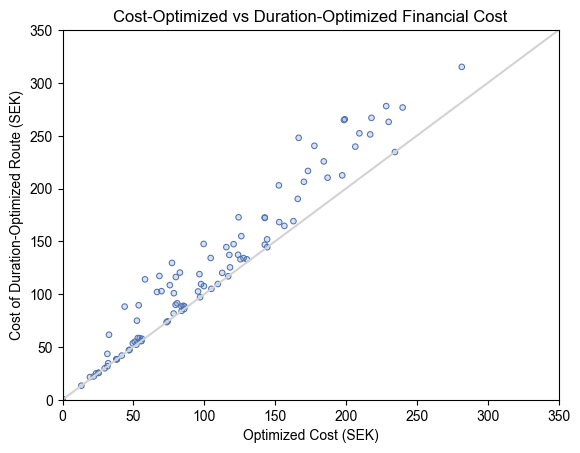

In [38]:
p = so.Plot(successful, x=successful['optimizedCost'], y=successful['optimizedDurationFinancialCost']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots()).label(x="Optimized Cost (SEK)", y="Cost of Duration-Optimized Route (SEK)", color=str.capitalize, title="Cost-Optimized vs Duration-Optimized Financial Cost")

fig, ax = plt.subplots()
plt.xlim(0, 350)
plt.ylim(0, 350)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgrey')

p.on(ax).show()

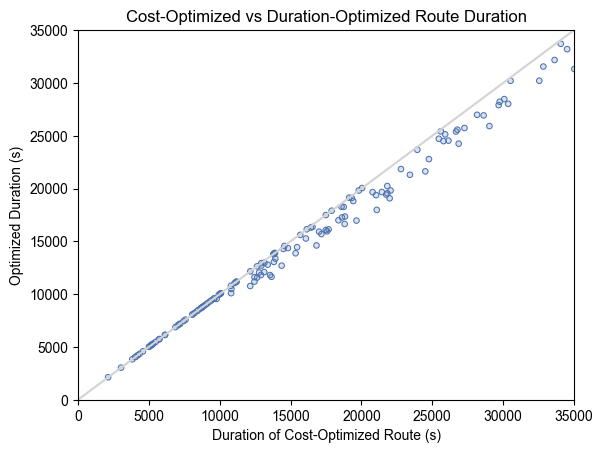

In [39]:
p = so.Plot(successful, x=successful['optimizedCostDuration'], y=successful['optimizedDuration']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots()).label(x="Duration of Cost-Optimized Route (s)", y="Optimized Duration (s)", color=str.capitalize, title="Cost-Optimized vs Duration-Optimized Route Duration")

fig, ax = plt.subplots()
plt.xlim(0, 35000)
plt.ylim(0, 35000)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgrey')

p.on(ax).show()


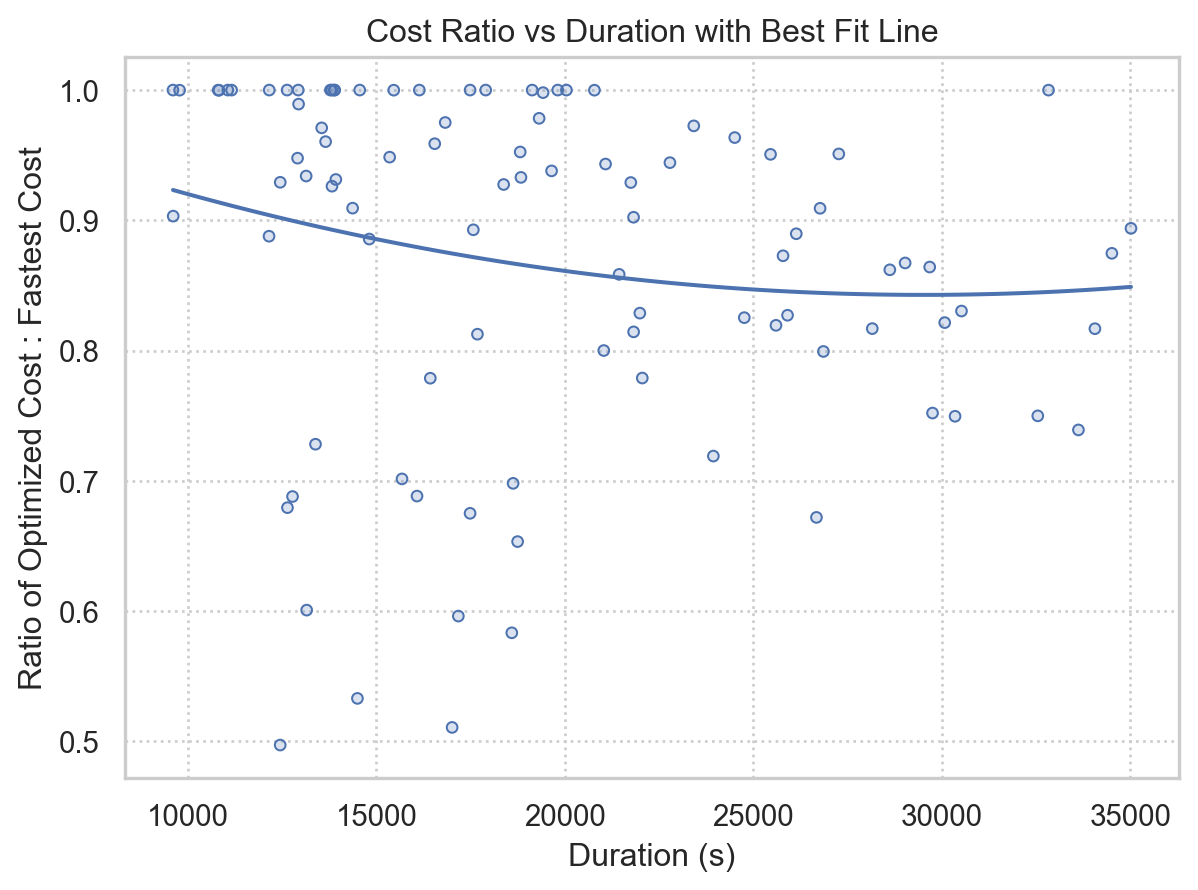

In [40]:

(
    so.Plot(successful, x=successful['optimizedCostDuration'], y=successful['optimizedCost']/successful['optimizedDurationFinancialCost']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
    .label(
        x="Duration (s)", y="Ratio of Optimized Cost : Fastest Cost",
        color=str.capitalize,
        title="Cost Ratio vs Duration with Best Fit Line",
    )
)

NameError: name 'json' is not defined